### Capstone Project: Health Care - NIDDK Dataset

### Problem Statement:
1)  NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

2) The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 

3) Build a model to accurately predict whether the patients in the dataset have diabetes or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the required data file in pandas dataframe

diabetes_data = pd.read_csv(
    "D:\\Data Science\\Capstone Project\\NIDDK Project\\health care diabetes.csv"
)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#checking the shape of the dataframe

diabetes_data.shape

(768, 9)

In [4]:
# checking data type of the dataframe and Finding out the null values in data

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Changing 0 values in Insulin column as NaN value

zero_to_null = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[zero_to_null] = diabetes_data[zero_to_null].replace(0, np.nan)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
# Display information about the DataFrame

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [8]:
# Count the number of missing values in each column of the diabetes_data DataFrame

diabetes_data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
# Generate descriptive statistics for the diabetes_data DataFrame and transpose the result

diabetes_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


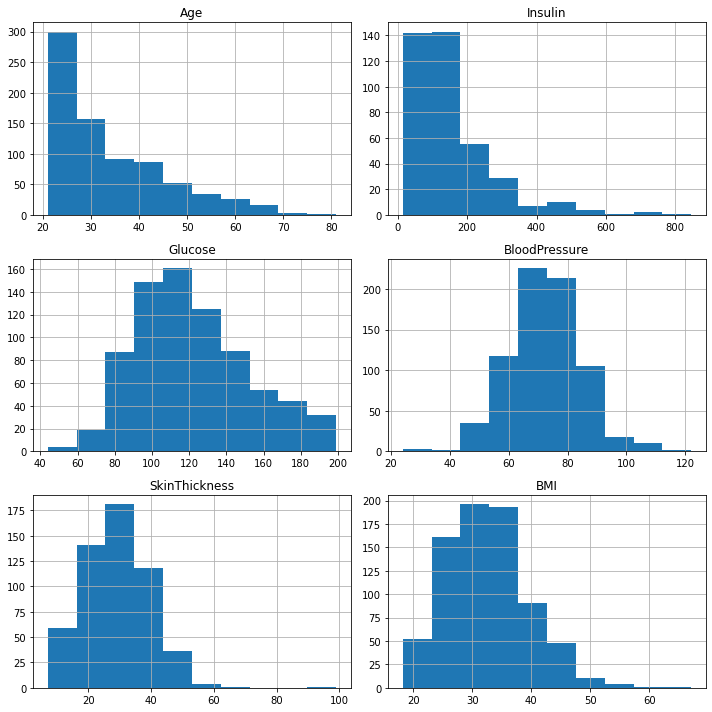

In [10]:
# Plot histograms for the selected columns: 'Age', 'Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI'


diabetes_data[[
    'Age', 'Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI'
]].hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

### Insulin data showed high left skewed, and Insulin values also depends on Age group. Hence, NaN values in Insulin is filled based on age group. 

In [11]:
# Create a new column indicating the age group for each row based on the 'Age' column
bins = [20, 30, 40, 50, 60, float('inf')]
labels = ['21-30', '31-40', '41-50', '51-60', 'above 60']
diabetes_data['Age Group'] = pd.cut(diabetes_data['Age'],
                                    bins=bins,
                                    labels=labels,
                                    include_lowest=True)

# Group the data by age group and calculate the median insulin value for each group
insulin_median_by_age_group = diabetes_data.groupby(
    'Age Group')['Insulin'].median()

# Print the results
print(insulin_median_by_age_group)

Age Group
21-30       105.0
31-40       140.0
41-50       131.0
51-60       207.0
above 60    180.0
Name: Insulin, dtype: float64


In [12]:
# Define a dictionary with average insulin values based on age groups

insulin_values = {
    '21-30': 105,
    '31-40': 140,
    '41-50': 131,
    '51-60': 207,
    'above 60': 180
}

# Fill NaN values in the 'Insulin' column based on the age group
diabetes_data['Insulin'] = diabetes_data.apply(
    lambda x: insulin_values[x['Age Group']]
    if pd.isna(x['Insulin']) else x['Insulin'],
    axis=1)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age Group
0,6,148.0,72.0,35.0,131.0,33.6,0.627,50,1,41-50
1,1,85.0,66.0,29.0,140.0,26.6,0.351,31,0,31-40
2,8,183.0,64.0,NaN,140.0,23.3,0.672,32,1,31-40
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,21-30
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,31-40


In [13]:
# Remaining variables have balanced dataset,
# Hence NaN values in those variables can be replaced by mean values of respective dataset

fillna_mean = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
diabetes_data[fillna_mean] = diabetes_data[fillna_mean].fillna(
    diabetes_data[fillna_mean].mean())
diabetes_data.isna().sum(
)  # No NaN values after replacing NaN values with mean.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age Group                   0
dtype: int64

<AxesSubplot:>

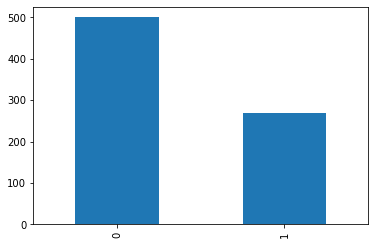

In [14]:
#Checking the distribution of Target variable in the data

diabetes_data['Outcome'].value_counts().plot(kind='bar')

####  As outcome data is not evenly distributed, we will create new samples using SMOTE method for outcome class '1'. This method will generate new samples using extrapolation and will not duplicate any available data.  

In [15]:
# Exported the data to prepare a Tableau Dashboard 

diabetes_data.to_excel('NIDDK_Updated Data.xlsx', sheet_name = 'NIDDK_Data')

In [16]:
# Install the imbalanced-learn library using pip
!pip install imbalanced-learn 

In [17]:
# Import the SMOTE class from the imblearn.over_sampling module

from imblearn.over_sampling import SMOTE

In [18]:
# Extract the feature columns and target column by dropping the 'Outcome' and 'Age Group' columns from the diabetes_data DataFrame

data_X = diabetes_data.drop(['Outcome','Age Group'], axis=1)
data_y = diabetes_data['Outcome']

In [19]:
# Apply SMOTE oversampling technique to balance the classes by creating synthetic samples

X_resampled, y_resampled = SMOTE(random_state=100).fit_resample(data_X, data_y)
print(X_resampled.shape, y_resampled.shape)

(1000, 8) (1000,)


<AxesSubplot:>

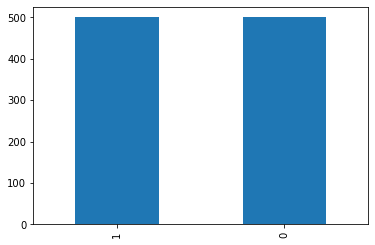

In [20]:
# Plot a bar chart to visualize the class distribution after oversampling
y_resampled.value_counts().plot(kind='bar')

In [21]:
# Concatenate X_resampled and y_resampled along axis 1 to create the resampled data

data_resampled = pd.concat([X_resampled, y_resampled],axis=1)
data_resampled.shape

(1000, 9)

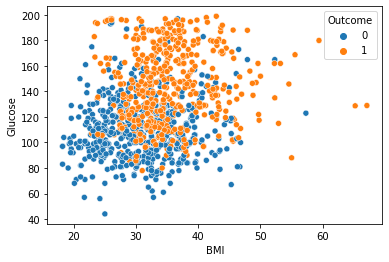

In [22]:
# Create a scatter plot of 'BMI' vs 'Glucose' using the resampled data, with 'Outcome' as the hue

sns.scatterplot(x="BMI", y="Glucose", data=data_resampled, hue="Outcome");

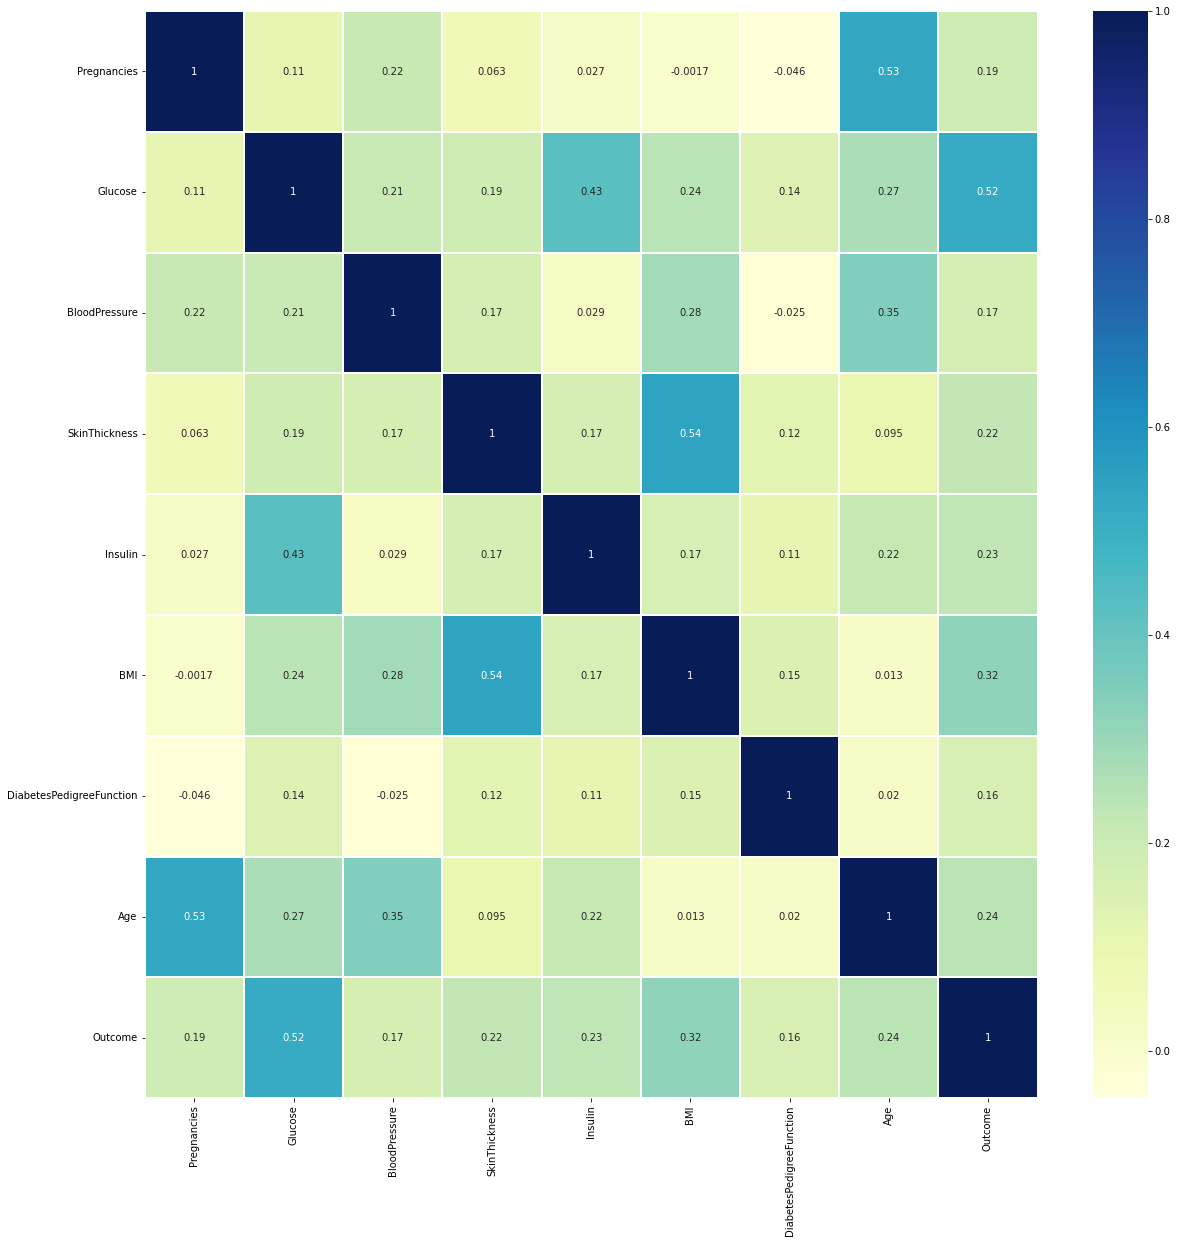

In [23]:
# Create a heatmap of the correlation matrix of the resampled data

sns.heatmap(data_resampled.corr(),annot=True, cmap='YlGnBu', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [24]:
data_resampled.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

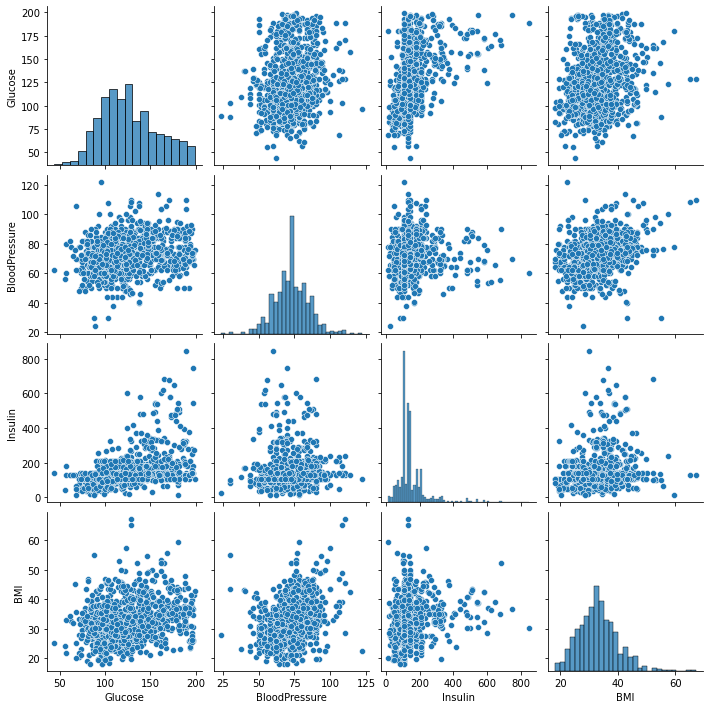

In [25]:
# 'data' variale is already defined for only numerical continous features in above code. 
select_data=data_resampled.loc[:,['Glucose','BloodPressure','Insulin','BMI']]
sns.pairplot(select_data)

### A baseline model to predict the risk of diabetes using a various machine learning models

In [26]:
# Import the StandardScaler from sklearn.preprocessing

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Get the column names of the resampled data (excluding the target column)

columns = data_resampled.columns[:-1]
scaled_data = sc.fit_transform(data_resampled[columns])
diabetes_data_sc = pd.DataFrame(scaled_data, columns= columns)
diabetes_data_sc.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.636169,0.674491,-0.076432,0.648324,-0.210513,0.081380,0.448508,1.402507
1,-0.897507,-1.336990,-0.589807,-0.076048,-0.115817,-0.959876,-0.403452,-0.253654
2,1.249639,1.791981,-0.760932,-0.057525,-0.115817,-1.450754,0.587414,-0.166488
3,-0.897507,-1.209277,-0.589807,-0.800419,-0.599819,-0.736750,-0.971425,-1.125318
4,-1.204242,0.323280,-2.814432,0.648324,0.178792,1.494513,5.575700,-0.079321


In [27]:
# Create empty lists to store models and evaluation metrics

models = []
model_accuracy = []
model_f1_score = []
model_auc_score = []

## 1) Logistic Regression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Assigning the feature data to X
X = diabetes_data_sc

# Assigning the target variable to y
y = data_resampled['Outcome']

# Splitting the data into training and testing sets
# Splitting the data into training and testing sets using train_test_split function

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 100)

In [29]:
# Logistic regression
model_lr = LogisticRegression(random_state=100)  # Create a logistic regression model
model_lr.fit(X_train, y_train)  # Fit the model to the training data
y_pred = model_lr.predict(X_test)  # Predict the target variable for the test data
accuracy_lr = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
print('Accuracy of Logistic Regression= %.3f' % accuracy_lr)  # Print the accuracy of the model

Accuracy of Logistic Regression= 0.735


In [30]:
from sklearn.model_selection import GridSearchCV, cross_val_score
parameters = {'C': np.logspace(0, 5, 50)}  # Define the parameter grid for grid search

In [31]:
gs_lr = GridSearchCV(model_lr, param_grid=parameters, cv=5, verbose=0)  # Perform grid search with cross-validation
gs_lr.fit(X_train, y_train)  # Fit the grid search model to the training data

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=100),
             param_grid={'C': array([1.00000000e+00, 1.26485522e+00, 1.59985872e+00, 2.02358965e+00,
       2.55954792e+00, 3.23745754e+00, 4.09491506e+00, 5.17947468e+00,
       6.55128557e+00, 8.28642773e+00, 1.04811313e+01, 1.32571137e+01,
       1.67683294e+01, 2.12095089e+01, 2.68269580e+01, 3.39322177e+01,
       4.29193426e+01, 5.42867...
       2.81176870e+02, 3.55648031e+02, 4.49843267e+02, 5.68986603e+02,
       7.19685673e+02, 9.10298178e+02, 1.15139540e+03, 1.45634848e+03,
       1.84206997e+03, 2.32995181e+03, 2.94705170e+03, 3.72759372e+03,
       4.71486636e+03, 5.96362332e+03, 7.54312006e+03, 9.54095476e+03,
       1.20679264e+04, 1.52641797e+04, 1.93069773e+04, 2.44205309e+04,
       3.08884360e+04, 3.90693994e+04, 4.94171336e+04, 6.25055193e+04,
       7.90604321e+04, 1.00000000e+05])})

In [32]:
lr_best_param = gs_lr.best_params_  # Get the best parameters found by grid search
lr_best_param

{'C': 2.023589647725157}

In [33]:
# Logistic regression
model_lr_1 = LogisticRegression(C=2.02, random_state=100)  # Create a logistic regression model with best parameters
model_lr_1.fit(X_train, y_train)  # Fit the model to the training data with best parameters
y_pred_lr = model_lr_1.predict(X_test)  # Predict the target variable for the test data using the updated model
accuracy_lr = accuracy_score(y_test, y_pred_lr)  # Calculate the accuracy of the updated model
print('Accuracy of Logistic Regression= %.3f' % accuracy_lr)  # Print the accuracy of the updated model

Accuracy of Logistic Regression= 0.730


In [34]:
from sklearn.metrics import roc_auc_score, roc_curve

probs = model_lr.predict_proba(X_test)  # Get predicted probabilities for the test data
probs = probs[:, 1]  # Extract probabilities of the positive class
auc_lr = roc_auc_score(y_test, probs)  # Calculate the AUC-ROC score
print('AUC:', auc_lr)  # Print the AUC-ROC score

AUC: 0.8400440705128205


Text(0.5, 1.0, 'ROC curve - Logistic Regression')

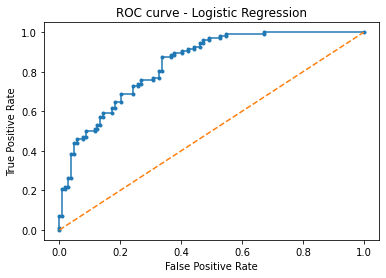

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, probs)  # Calculate ROC curve metrics
plt.plot(fpr, tpr, marker='.')  # Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot diagonal line
plt.xlabel('False Positive Rate')  # Set x-axis label
plt.ylabel('True Positive Rate')  # Set y-axis label
plt.title('ROC curve - Logistic Regression')  # Set title

In [36]:
#Append model name, model accuracy and AUC. 

models.append('LR')
model_accuracy.append(accuracy_lr)
model_auc_score.append(auc_lr)

## 2) Decision Tree:

In [37]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=100)

In [38]:
# Define the parameters for grid search
parameters = {
    'max_depth': [1, 2, 3, 4, 5, 6, None]
}
# Create a GridSearchCV object with DecisionTreeClassifier and parameters
gs_dt = GridSearchCV(model_dt, param_grid=parameters, cv=5, verbose=0)

gs_dt.fit(X_train, y_train)  # Fit the GridSearchCV object to the training data

gs_dt.best_params_  # Get the best parameters found by grid search

{'max_depth': 3}

In [39]:
# Get the best score found by grid search
gs_dt.best_score_

0.7474999999999999

In [40]:
model_dt = DecisionTreeClassifier(max_depth = 3)
model_dt.fit(X_train, y_train)
accuracy_dt = model_dt.score(X_test, y_test)
print('Accuracy of Decision Tree= %.3f' %accuracy_dt)

Accuracy of Decision Tree= 0.735


In [41]:
model_dt.feature_importances_

array([0.        , 0.61336446, 0.        , 0.03054576, 0.        ,
       0.20108104, 0.        , 0.15500874])

Text(0.5, 1.0, 'Feature Importance in Model')

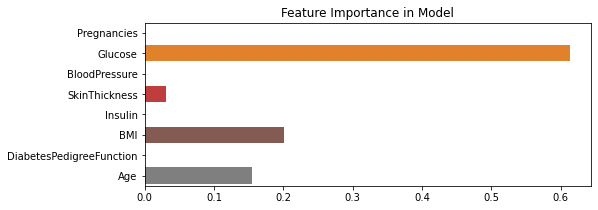

In [42]:
plt.figure(figsize=(8,3))  # Create a figure with a specific size
columns = X_train.columns  # Get the column names of X_train
sns.barplot(y=columns, x=model_dt.feature_importances_)  # Create a bar plot of feature importance
plt.title("Feature Importance in Model")  # Set the title of the plot

AUC: 0.8198617788461539


Text(0.5, 1.0, 'ROC curve - Decision Tree')

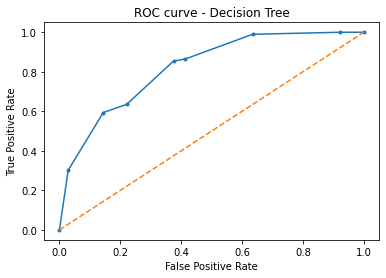

In [43]:
probs = model_dt.predict_proba(X_test)  # Get the predicted probabilities from the model
probs = probs[:,1]  # Extract the probabilities for the positive class
auc_dt = roc_auc_score(y_test, probs)  # Calculate the AUC score
print('AUC:', auc_dt)  # Print the AUC score

fpr, tpr, thresholds = roc_curve(y_test, probs)  # Calculate the ROC curve
plt.plot(fpr, tpr, marker='.')  # Plot the ROC curve
plt.plot([0,1], [0,1], linestyle='--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')  # Set the x-axis label
plt.ylabel('True Positive Rate')  # Set the y-axis label
plt.title('ROC curve - Decision Tree')  # Set the title of the plot

In [44]:
models.append('DT')  # Add the model name to the list of models
model_accuracy.append(accuracy_dt)  # Add the model accuracy to the list of accuracies
model_auc_score.append(auc_dt)  # Add the AUC score to the list of AUC scores

## 3) RandomForest Classifier:

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=100)  # Create a Random Forest classifier

In [46]:
parameters = {
    'n_estimators' : [10,50,100,150],  # Define the number of trees in the forest
    'max_depth' : [None,1,3,5,7,9],  # Define the maximum depth of the tree
    'min_samples_leaf' : [1,3,5,7,9],  # Define the minimum number of samples required to be at a leaf node
    'min_samples_split': [1,2,3,4,5]  # Define the minimum number of samples required to split an internal node
}

In [47]:
gs_rf = GridSearchCV(estimator=rf,param_grid=parameters,cv=5,verbose=0)  # Perform grid search to find the best hyperparameters
gs_rf.fit(X_train, y_train)  # Fit the model with training data

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': [None, 1, 3, 5, 7, 9],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 150]})

In [48]:
gs_rf.best_score_  # Print the best score achieved during grid search

0.8125

In [49]:
gs_rf.best_params_  # Print the best hyperparameters found during grid search

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [50]:
model_rf = RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_leaf=1,min_samples_split=5,random_state=100)  # Create a Random Forest classifier with specific hyperparameters
model_rf.fit(X_train, y_train)  # Fit the model with training data
accuracy_rf = model_rf.score(X_test, y_test)  # Calculate the accuracy of the model on test data
print('Accuracy of Random Forest= %.3f' %accuracy_rf)  # Print the accuracy

Accuracy of Random Forest= 0.840


Text(0.5, 1.0, 'Feature Importance in Model')

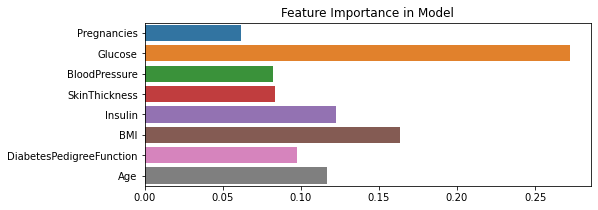

In [51]:
plt.figure(figsize=(8,3))
sns.barplot(y=columns, x=model_rf.feature_importances_)  # Plot the feature importance in the model
plt.title("Feature Importance in Model")

AUC: 0.9215745192307692


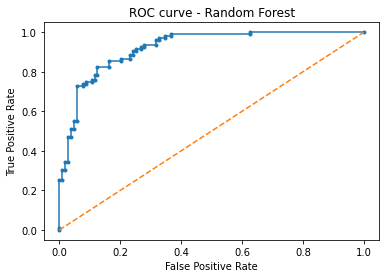

In [52]:
probs = model_rf.predict_proba(X_test)  # Get predicted probabilities from the model
probs = probs [:,1]  # Extract the probabilities for the positive class
auc_rf = roc_auc_score(y_test, probs)  # Calculate the AUC score
print('AUC:', auc_rf)  # Print the AUC score

fpr, tpr, thresholds = roc_curve(y_test, probs)  # Calculate the ROC curve
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Random Forest');

In [53]:
models.append('RF')  # Add the model name to a list of models
model_accuracy.append(accuracy_rf)  # Add the model accuracy to a list
model_auc_score.append(auc_rf)  # Add the model AUC score to a list

## 4) K-Nearest Neighbour (KNN):

In [54]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()  # Create KNN classifier

In [55]:
knn_neighbors = [i for i in range(2,20)]  # List of neighbors to test
parameters = {
    'n_neighbors': knn_neighbors   
}

In [56]:
gs_knn = GridSearchCV(estimator=model_knn,param_grid=parameters,cv=5,verbose=0)  # Perform grid search for best parameters
gs_knn.fit(X_train, y_train)  # Fit the model with training data

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19]})

In [57]:
gs_knn.best_params_  # Print the best parameters found by grid search

{'n_neighbors': 14}

In [58]:
gs_knn.best_score_  # Print the best score achieved by the model

0.7699999999999999

In [59]:
model_knn = KNeighborsClassifier(n_neighbors=3, p=2)  # Create KNN model with specified parameters
model_knn.fit(X_train,y_train)  # Fit the model with training data
model_knn.score(X_train,y_train)  # Calculate the accuracy score on training data

0.88125

In [60]:
accuracy_knn = model_knn.score(X_test, y_test)  # Calculate the accuracy score on test data
print('Accuracy of KNN= %.3f' %accuracy_knn)

Accuracy of KNN= 0.790


In [61]:
pred_y_knn = model_knn.predict(X_test)  # Make predictions on test data
accuracy_score(y_test,pred_y_knn)  # Calculate accuracy score using predicted and true labels

0.79

AUC: 0.8476061698717948


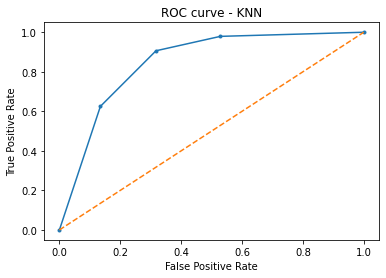

In [62]:
probs = model_knn.predict_proba(X_test)  # Get class probabilities for test data
probs = probs [:,1]  # Extract probabilities for positive class
auc_knn = roc_auc_score(y_test, probs)  # Calculate AUC score
print('AUC:', auc_knn)

fpr, tpr, thresholds = roc_curve(y_test, probs)  # Calculate ROC curve
plt.plot(fpr,tpr,marker='.')  # Plot ROC curve
plt.plot([0,1],[0,1],linestyle='--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - KNN');

In [63]:
models.append('KNN')  # Add model name to list
model_accuracy.append(accuracy_knn)  # Add model accuracy to list
model_auc_score.append(auc_knn)  # Add model AUC score to list

In [64]:
gs_knn.cv_results_['mean_test_score']  # Print mean test scores for different parameter values

array([0.745  , 0.7675 , 0.7425 , 0.75875, 0.74625, 0.755  , 0.7625 ,
       0.7525 , 0.76125, 0.76125, 0.76875, 0.75875, 0.77   , 0.76375,
       0.7675 , 0.76   , 0.7675 , 0.76625])

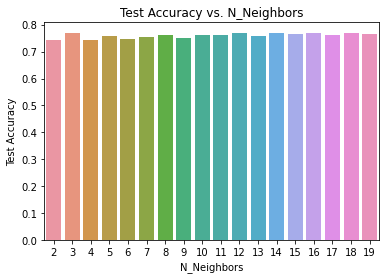

In [65]:
plt.figure(figsize=(6,4))
sns.barplot(x=knn_neighbors, y=gs_knn.cv_results_['mean_test_score'])  # Plot bar chart of test accuracy vs. number of neighbors
plt.xlabel("N_Neighbors")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. N_Neighbors");

## 5) Support Vector Machine (SVM):

In [66]:
from sklearn.svm import SVC
model_svm = SVC(kernel='rbf', random_state=100, verbose=0)  # Create an SVM model with RBF kernel

In [67]:
parameters = {
    'C': [1, 5, 10, 15, 20, 25]  # Define a grid of C values for hyperparameter tuning
}

In [68]:
gs_svm = GridSearchCV(estimator=model_svm, param_grid=parameters, cv=5, verbose=5)  # Perform grid search with cross-validation
gs_svm.fit(X, y)  # Fit the model to the training data

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...............................C=1;, score=0.770 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.755 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.820 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=0.830 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0.805 total time=   0.0s
[CV 1/5] END ...............................C=5;, score=0.780 total time=   0.0s
[CV 2/5] END ...............................C=5;, score=0.730 total time=   0.0s
[CV 3/5] END ...............................C=5;, score=0.810 total time=   0.0s
[CV 4/5] END ...............................C=5;, score=0.855 total time=   0.0s
[CV 5/5] END ...............................C=5;, score=0.830 total time=   0.0s
[CV 1/5] END ..............................C=10;, score=0.765 total time=   0.0s
[CV 2/5] END ..............................C=10;,

GridSearchCV(cv=5, estimator=SVC(random_state=100, verbose=0),
             param_grid={'C': [1, 5, 10, 15, 20, 25]}, verbose=5)

In [69]:
gs_svm.best_score_

0.8009999999999999

In [70]:
gs_svm.best_params_

{'C': 5}

In [71]:
gs_svm.best_estimator_

SVC(C=5, random_state=100, verbose=0)

In [72]:
model_svm_1 = SVC(probability=True, C=5, kernel='rbf', random_state=100, verbose=0)  # Create a new SVM model with optimized hyperparameters

In [73]:
model_svm_1.fit(X_train,y_train)

SVC(C=5, probability=True, random_state=100, verbose=0)

In [74]:
model_svm_1.score(X_train,y_train)

0.88625

In [75]:
accuracy_svm = model_svm_1.score(X_test, y_test)  # Calculate the accuracy of the SVM model
print('Accuracy of SVM = %.3f' % accuracy_svm)

Accuracy of SVM = 0.780


AUC: 0.874


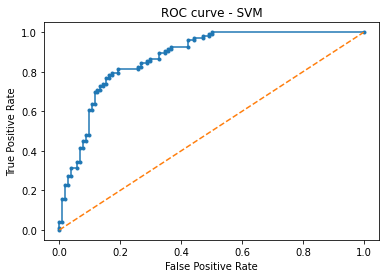

In [76]:
probs = model_svm_1.predict_proba(X_test)  # Get the predicted probabilities from the SVM model
probs = probs[:, 1]  # Select the probabilities for the positive class
auc_svm = roc_auc_score(y_test, probs)  # Calculate the AUC score
print('AUC: %.3f' % auc_svm)

fpr, tpr, thresholds = roc_curve(y_test, probs)  # Calculate the ROC curve values
plt.plot(fpr, tpr, marker='.')  # Plot the ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - SVM');

In [77]:
models.append('KNN')
model_accuracy.append(accuracy_svm)
model_auc_score.append(auc_svm)
print(accuracy_svm, '%.3f' % auc_svm)  # Print the accuracy and AUC score

0.78 0.874


## 6) Naive Bayes Algorithm:

In [78]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()  # Create Gaussian Naive Bayes model

In [79]:
model_gnb.fit(X_train, y_train)  # Train the model

GaussianNB()

In [80]:
accuracy_gnb = model_gnb.score(X_test, y_test)  # Calculate accuracy score
accuracy_gnb

0.695

AUC: 0.821


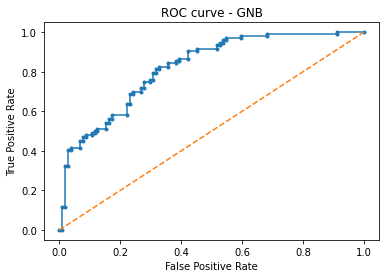

In [81]:
probs = model_gnb.predict_proba(X_test)  # Get predicted probabilities
probs = probs[:, 1]  # Select probabilities for positive class
auc_gnb = roc_auc_score(y_test, probs)  # Calculate AUC score
print('AUC: %.3f' % auc_gnb)

fpr, tpr, thresholds = roc_curve(y_test, probs)  # Calculate ROC curve
plt.plot(fpr, tpr, marker='.')  # Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')  # Add diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - GNB');

In [82]:
models.append('GNB')  # Add model name to list
model_accuracy.append(accuracy_gnb)  # Add accuracy score to list
model_auc_score.append(auc_gnb)  # Add AUC score to list
print(accuracy_gnb, '%.3f' % auc_gnb)  # Print accuracy score and AUC score

0.695 0.821


## 7) Ensembler Learning --> Adaptive Boosting

In [83]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(random_state=100)  # Initialize AdaBoost classifier

In [84]:
parameters = {
    'n_estimators': [10,100,500,1000]  # Set parameter grid for grid search
}
gs_ada = GridSearchCV(model_ada,param_grid=parameters,cv=5,verbose=0)  # Perform grid search
gs_ada.fit(X,y)  # Fit grid search to data

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=100),
             param_grid={'n_estimators': [10, 100, 500, 1000]})

In [85]:
gs_ada.best_params_  # Print the best parameters found by grid search

{'n_estimators': 100}

In [86]:
gs_ada.best_score_  # Print the best score found by grid search

0.78

In [87]:
model_ada = AdaBoostClassifier(n_estimators=100,random_state=100)  # Initialize AdaBoost classifier with best parameters
model_ada.fit(X_train,y_train)  # Fit the model to the training data
accuracy_ada = model_ada.score(X_test,y_test)  # Calculate accuracy on the test data
accuracy_ada  # Print the accuracy

0.78

AUC: 0.852


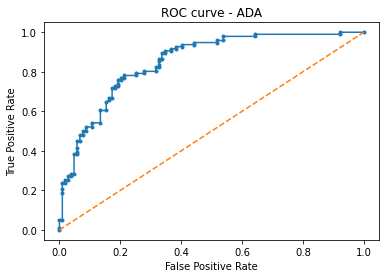

In [88]:
probs = model_ada.predict_proba(X_test)  # Get predicted probabilities
probs = probs [:,1]  # Extract probabilities for positive class
auc_ada = roc_auc_score(y_test, probs)  # Calculate AUC score
print('AUC: %.3f' %auc_ada)  # Print the AUC score

fpr, tpr, thresholds = roc_curve(y_test, probs)  # Calculate ROC curve values
plt.plot(fpr,tpr,marker='.')  # Plot ROC curve
plt.plot([0,1],[0,1],linestyle='--')  # Plot diagonal line
plt.xlabel('False Positive Rate')  # Set x-axis label
plt.ylabel('True Positive Rate')  # Set y-axis label
plt.title('ROC curve - ADA');  # Set title for the plot

In [89]:
models.append('ADA')  # Append model name to a list
model_accuracy.append(accuracy_ada)  # Append accuracy to a list
model_auc_score.append(auc_ada)  # Append AUC score to a list
print(accuracy_ada, '%.3f' % auc_ada)  # Print accuracy and AUC score

0.78 0.852


## 8) Ensembler Learning --> Gradient Boosting

In [90]:
!pip install xgboost  # Install XGBoost library
from xgboost import XGBClassifier  # Import XGBoost classifier
xgb = XGBClassifier()  # Initialize XGBoost classifier

ERROR: Invalid requirement: '#'


In [91]:
parameters = {
    'n_estimators': range(2, 10, 1),  # Define range of values for number of estimators
    'max_depth': range(10, 250, 50),  # Define range of values for maximum depth
    'learning_rate': [0.1, 0.01, 0.05]  # Define learning rates to be tested
}

gs_xgb = GridSearchCV(xgb, param_grid=parameters, cv=5, verbose=0)  # Perform grid search with cross-validation
gs_xgb.fit(X, y)  # Fit the model with the best parameters

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...e,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(10, 250, 50),
                         'n_estimators': range(2, 10)})

In [92]:
gs_xgb.best_params_  # Display the best parameters found by grid search

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 8}

In [93]:
gs_xgb.best_score_  # Display the best score obtained by grid search

0.7909999999999999

In [94]:
model_xgb = XGBClassifier(n_estimators=8, learning_rate=0.1, max_depth=10)  # Create XGBoost classifier with specified parameters
model_xgb.fit(X_train, y_train)  # Fit the XGBoost model to the training data
accuracy_xgb = model_xgb.score(X_test, y_test)  # Calculate the accuracy of the model on the test data
accuracy_xgb  # Display the accuracy of the model on the test data

0.76

In [95]:
model_xgb.score(X_train, y_train)  # Calculate the accuracy of the model on the training data

0.9325

AUC: 0.853


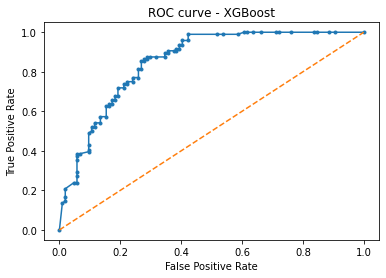

In [96]:
probs = model_xgb.predict_proba(X_test)  # Calculate the predicted probabilities for each class on the test data
probs = probs[:, 1]  # Keep the probabilities of the positive class
auc_xgb = roc_auc_score(y_test, probs)  # Calculate the AUC score using the predicted probabilities
print('AUC: %.3f' % auc_xgb)  # Display the AUC score

fpr, tpr, thresholds = roc_curve(y_test, probs)  # Calculate the ROC curve
plt.plot(fpr, tpr, marker='.')  # Plot the ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')  # Set x-axis label
plt.ylabel('True Positive Rate')  # Set y-axis label
plt.title('ROC curve - XGBoost');  # Set title for the plot

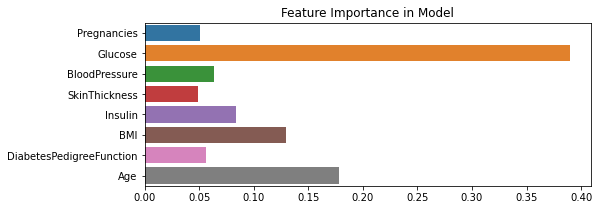

In [97]:
plt.figure(figsize=(8, 3))  # Create a new figure with specified size
sns.barplot(y=columns, x=model_xgb.feature_importances_)  # Create a bar plot for feature importance
plt.title("Feature Importance in Model");  # Set title for the plot

In [98]:
models.append('XGBoost')  # Add model name to the list of models
model_accuracy.append(accuracy_xgb)  # Add model accuracy to the list
model_auc_score.append(auc_xgb)  # Add AUC score to the list
print(accuracy_xgb, '%.3f' % auc_xgb)  # Display accuracy and AUC score

0.76 0.853


In [99]:
# Creating a dataframe to summarize model performance
model_summary = pd.DataFrame(zip(models,model_accuracy,model_auc_score),columns= ['Model','Accuracy','AUC'])
model_summary = model_summary.set_index('Model')

# Displaying the model summary table
model_summary

,Accuracy,AUC
Model,,
LR,0.730,0.840044
DT,0.735,0.819862
RF,0.840,0.921575
KNN,0.790,0.847606
KNN,0.780,0.873598
GNB,0.695,0.820613
ADA,0.780,0.851813
XGBoost,0.760,0.853015


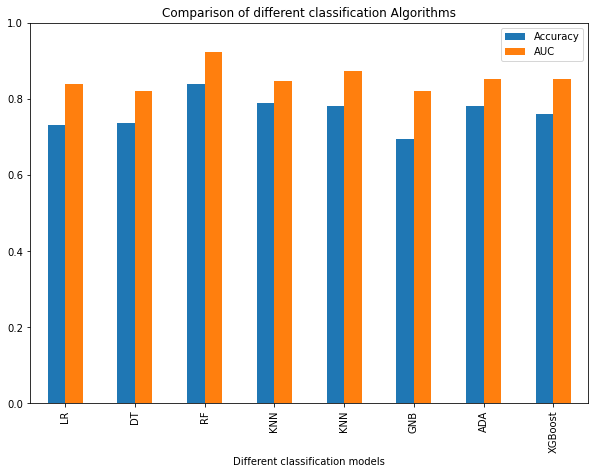

In [100]:
# Plotting a bar chart to compare different classification models
model_summary.plot(figsize=(10,7),kind='bar')
plt.xlabel('Different classification models')
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title ("Comparison of different classification Algorithms");

As Random Forest Model showed highest accuracy in our data, we will set Random Forest as our Final Model

### Data Modeling: 

Creating a Classification report for Random Forest model

In [101]:
# Initializing the best model with specific hyperparameters
best_model = RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_leaf=1,min_samples_split=5,random_state=100)

In [102]:

# Fitting the best model on the training data
best_model.fit(X_train,y_train)

# Predicting the target variable using the best model on the test data
y_predict_rf = best_model.predict(X_test)

# Generating the classification report
report_RF = classification_report(y_test, y_predict_rf)
print(report_RF)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       104
           1       0.83      0.84      0.84        96

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [103]:
# Generating the confusion matrix
CF_matrix = confusion_matrix(y_test,y_predict_rf)
print('Confusion Matrix:\n',CF_matrix)

Confusion Matrix:
 [[87 17]
 [15 81]]


<AxesSubplot:>

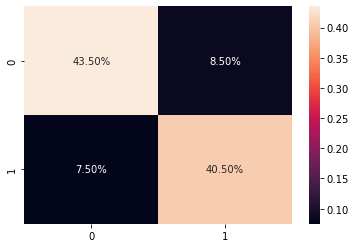

In [104]:
# Creating a heatmap of the confusion matrix
sns.heatmap(CF_matrix/np.sum(CF_matrix),annot=True,fmt='.2%')

In [105]:
model_score = best_model.score(X_test, y_test)
print ('Accuracy of Random Forest: %.3f' % model_score)

Accuracy of Random Forest: 0.840


### With NIDDK dataset, Random Forest method gave best accuracy (84%) in prediction of diabetes compared to other machine learning methods.  

## Data Visualization: 

### A tableau dashboard is created to visualize the data with the following objectives: 

    a. Pie chart to describe the diabetic or non-diabetic population
    b. Scatter charts between relevant variables to analyze the relationships
    c. Histogram or frequency charts to analyze the distribution of the data
    d. Heatmap of correlation analysis among the relevant variables
    e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different
    variables for these age brackets using a bubble chart.
    
### Please find the tableau project on below link: 

### https://public.tableau.com/app/profile/dharmesh1254/viz/DiabetesPredictionAnalysisNIDDKDataset/Dashboard1